In [ ]:
!pip install torchaudio librosa fastai streamlit matplotlib

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/last/dataset.zip"
extract_path = "/content/dataset_split2"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
import os

root_dir = "/content/dataset_split2/valid"

for class_name in os.listdir(root_dir):
    class_path = os.path.join(root_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    print(f"\nProcessing class: {class_name}")
    files = sorted(os.listdir(class_path))
    for i, filename in enumerate(files, start=1):
        ext = os.path.splitext(filename)[1]
        if ext.lower() != ".png":
            continue

        new_name = f"{class_name}_{i:04d}{ext}"
        old_path = os.path.join(class_path, filename)
        new_path = os.path.join(class_path, new_name)

        if old_path != new_path:
            print(f"Renaming: {filename} → {new_name}")
            os.rename(old_path, new_path)
        else:
            print(f"Skipping (same name): {filename}")

In [ ]:
import os
import zipfile
root = "/content/dataset_split2"
zip_name = "dataset3.zip"
with zipfile.ZipFile(zip_name, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(root):
        for file in files:
            file_path = os.path.join(root, file)
            arcname = os.path.relpath(file_path, root)
            zipf.write(file_path, arcname)

Class 'Cm': 10 images
Class 'Bb': 24 images
Class 'B': 28 images
Class 'G': 142 images
Class 'Cm7': 2 images
Class 'C': 50 images
Class 'Dm': 6 images
Class 'Bmaj7': 2 images
Class 'F': 20 images
Class 'Gag': 2 images
Class 'D7': 1 images
Class 'Dm7': 1 images
Class 'Eb': 43 images
Class 'Gm7': 2 images
Class 'Gm': 21 images
Class 'D': 38 images
Class 'G7': 3 images
Class 'Ebmaj7': 6 images
Class 'Am': 7 images
Class 'B9': 2 images
Class 'Cm9': 3 images
Class 'A': 6 images
Class 'Gm9': 2 images


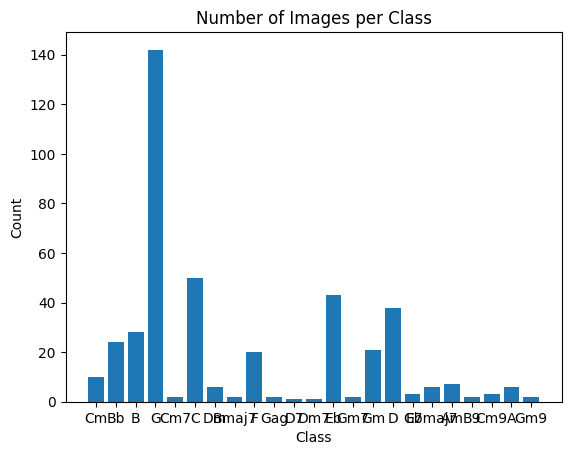

In [12]:
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt

path = Path("/content/dataset_split2/test")
counts = {p.name: len(list(p.glob("*.png"))) for p in path.iterdir() if p.is_dir()}

for k, v in counts.items():
    print(f"Class '{k}': {v} images")

plt.bar(counts.keys(), counts.values())
plt.title("Number of Images per Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

Class 'G7': 3 images
Class 'B9': 1 images
Class 'A': 11 images
Class 'Gm9': 1 images
Class 'Bb': 48 images
Class 'Cm7': 3 images
Class 'Am': 11 images
Class 'Gm': 41 images
Class 'Ebmaj7': 11 images
Class 'Dm7': 2 images
Class 'Cm9': 3 images
Class 'C': 99 images
Class 'B': 54 images
Class 'Dm': 10 images
Class 'Bmaj7': 1 images
Class 'Cm': 17 images
Class 'D7': 0 images
Class 'Gag': 4 images
Class 'Eb': 83 images
Class 'F': 38 images
Class 'G': 281 images
Class 'D': 73 images
Class 'Gm7': 4 images


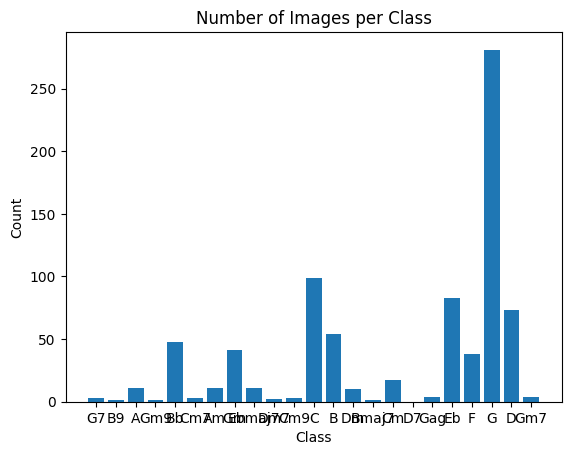

In [19]:
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt

path = Path("/content/dataset_split2/val")
counts = {p.name: len(list(p.glob("*.png"))) for p in path.iterdir() if p.is_dir()}

for k, v in counts.items():
    print(f"Class '{k}': {v} images")

plt.bar(counts.keys(), counts.values())
plt.title("Number of Images per Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

Class 'Cm': 985 images
Class 'Bb': 985 images
Class 'B': 985 images
Class 'G': 985 images
Class 'Cm7': 985 images
Class 'C': 985 images
Class 'Dm': 985 images
Class 'Bmaj7': 985 images
Class 'F': 985 images
Class 'Gag': 985 images
Class 'D7': 985 images
Class 'Dm7': 985 images
Class 'Eb': 985 images
Class 'Gm7': 985 images
Class 'Gm': 985 images
Class 'D': 985 images
Class 'G7': 985 images
Class 'Ebmaj7': 985 images
Class 'Am': 985 images
Class 'B9': 985 images
Class 'Cm9': 985 images
Class 'A': 985 images
Class 'Gm9': 985 images


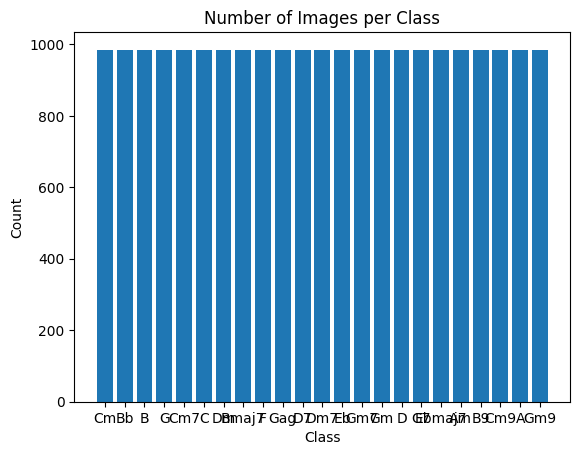

In [13]:
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt

path = Path("/content/dataset_split2/train")
counts = {p.name: len(list(p.glob("*.png"))) for p in path.iterdir() if p.is_dir()}

for k, v in counts.items():
    print(f"Class '{k}': {v} images")

plt.bar(counts.keys(), counts.values())
plt.title("Number of Images per Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [8]:
from fastai.vision.all import *
import matplotlib.pyplot as plt
path = Path('/content/dataset_split2')
dls = ImageDataLoaders.from_folder(
    path,
    train='train',
    valid='valid',
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(),
    bs=32
)
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 102MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,2.821533,2.601360,0.225282,04:03


epoch,train_loss,valid_loss,accuracy,time
0,1.718526,2.406203,0.267835,04:02
1,1.219084,2.428301,0.329161,04:02
2,0.898994,2.539406,0.324155,03:59
3,0.610811,2.652801,0.332916,03:59
4,0.503818,2.677486,0.331665,04:01


In [14]:
from fastai.vision.all import *
import matplotlib.pyplot as plt
path = Path('/content/dataset_split2')
dls = ImageDataLoaders.from_folder(
    path,
    train='train',
    valid='valid',
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(),
    bs=32
)
learn = vision_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 173MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,2.851506,2.783789,0.192741,03:45


epoch,train_loss,valid_loss,accuracy,time
0,1.928458,2.450419,0.229036,03:47
1,1.364068,2.498930,0.226533,03:45
2,0.951747,2.492431,0.270338,03:45
3,0.734053,2.524795,0.335419,03:46
4,0.626627,2.561258,0.336671,03:56


In [15]:
learn.export('chord_model18.pkl')

In [ ]:
from fastai.vision.all import *

learn = load_learner('/content/drive/MyDrive/chord_model.pkl')

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")



Test Accuracy: 29.22%

Classification Report:

              precision    recall  f1-score   support

           A       0.00      0.00      0.00         6
          Am       0.00      0.00      0.00         7
           B       0.05      0.04      0.04        28
          B9       0.00      0.00      0.00         2
          Bb       0.00      0.00      0.00        24
       Bmaj7       0.00      0.00      0.00         2
           C       0.23      0.06      0.10        50
          Cm       0.00      0.00      0.00        10
         Cm7       0.00      0.00      0.00         2
         Cm9       0.00      0.00      0.00         3
           D       0.07      0.03      0.04        38
          D7       0.00      0.00      0.00         1
          Dm       0.00      0.00      0.00         6
         Dm7       0.00      0.00      0.00         1
          Eb       0.00      0.00      0.00        43
      Ebmaj7       0.75      0.50      0.60         6
           F       0.36      0.20

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


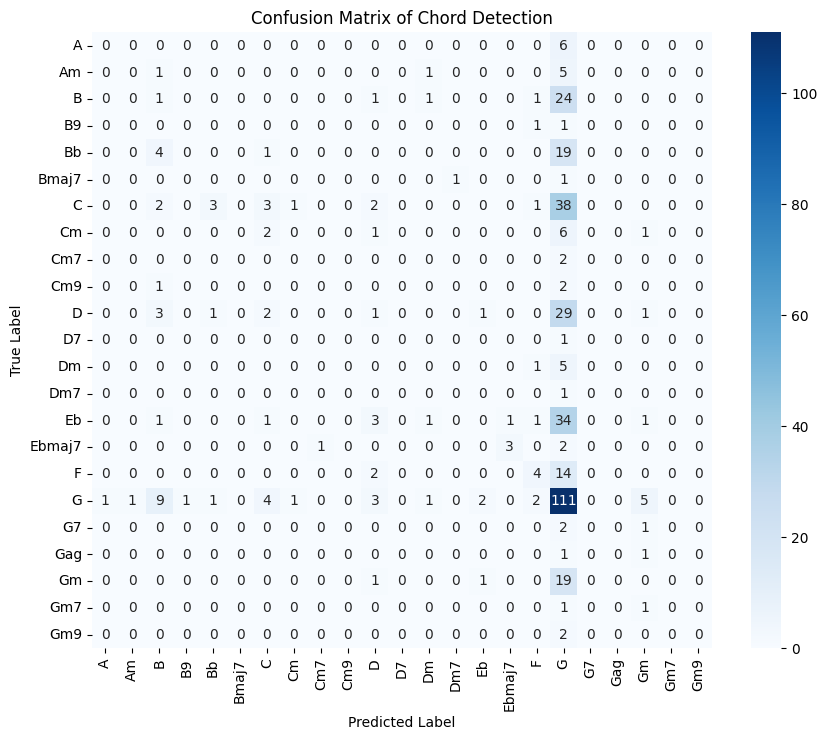

In [10]:
from fastai.learner import load_learner
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

learn = load_learner('/content/dataset_split2/chord_model.pkl')

test_path = "/content/dataset_split2/test"

y_true, y_pred = [], []

for label in os.listdir(test_path):
    label_path = os.path.join(test_path, label)
    for fname in os.listdir(label_path):
        if fname.endswith(".png"):
            img_path = os.path.join(label_path, fname)
            pred_class, _, _ = learn.predict(img_path)
            y_true.append(label)
            y_pred.append(str(pred_class))

acc = accuracy_score(y_true, y_pred)
print(f"\nTest Accuracy: {acc * 100:.2f}%")

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred))

labels = sorted(list(set(y_true)))
cm = confusion_matrix(y_true, y_pred, labels=labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Chord Detection")
plt.show()

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")



Test Accuracy: 32.07%

Classification Report:

              precision    recall  f1-score   support

           A       0.00      0.00      0.00         6
          Am       0.00      0.00      0.00         7
           B       0.25      0.07      0.11        28
          B9       0.00      0.00      0.00         2
          Bb       0.14      0.04      0.06        24
       Bmaj7       0.00      0.00      0.00         2
           C       0.11      0.06      0.08        50
          Cm       0.00      0.00      0.00        10
         Cm7       0.00      0.00      0.00         2
         Cm9       0.00      0.00      0.00         3
           D       0.12      0.03      0.04        38
          D7       0.00      0.00      0.00         1
          Dm       0.00      0.00      0.00         6
         Dm7       0.00      0.00      0.00         1
          Eb       0.19      0.07      0.10        43
      Ebmaj7       0.60      0.50      0.55         6
           F       0.67      0.20

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


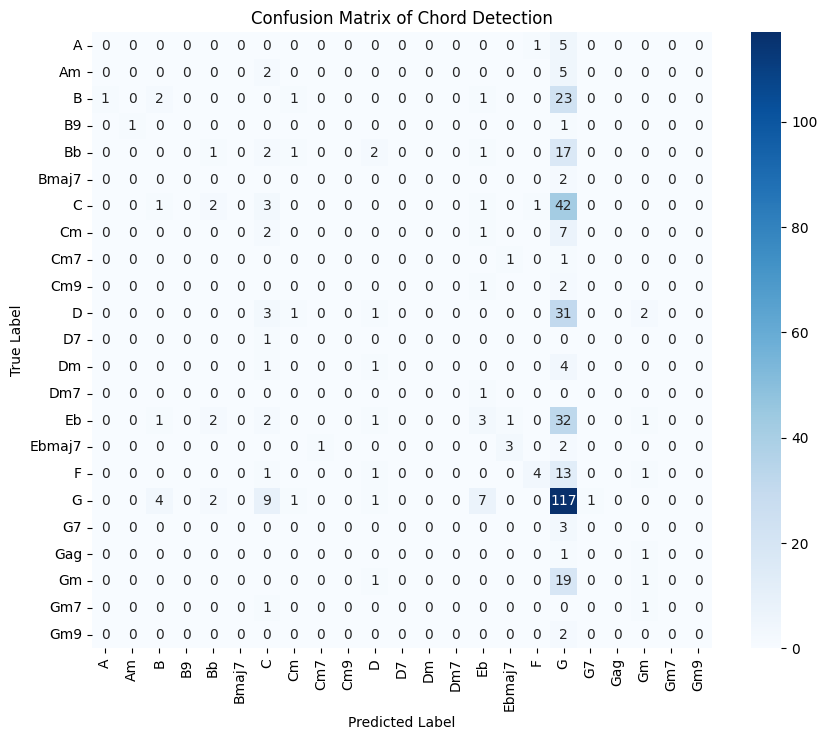

In [16]:
from fastai.learner import load_learner
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

learn = load_learner('/content/dataset_split2/chord_model18.pkl')

test_path = "/content/dataset_split2/test"

y_true, y_pred = [], []

for label in os.listdir(test_path):
    label_path = os.path.join(test_path, label)
    for fname in os.listdir(label_path):
        if fname.endswith(".png"):
            img_path = os.path.join(label_path, fname)
            pred_class, _, _ = learn.predict(img_path)
            y_true.append(label)
            y_pred.append(str(pred_class))

acc = accuracy_score(y_true, y_pred)
print(f"\nTest Accuracy: {acc * 100:.2f}%")

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred))

labels = sorted(list(set(y_true)))
cm = confusion_matrix(y_true, y_pred, labels=labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Chord Detection")
plt.show()